In [22]:
layout = @(nr,nc) tiledlayout(nr,nc, 'Padding', 'none', 'TileSpacing', 'compact');

<center> <h1>
Matched Filtering
</h1> </center>

In [19]:
T = sqrt(10*pi); L = 1000; t = linspace(-T,2*T,L); rng(5)
rect = @(t) 1.0*((-0.5<t) & (t<0.5));
g = @(t) sin(t.^2) .* rect(t./T-0.5);
w = @(t) randn(1,length(t));
x = @(t) g(t) + w(t);
h = @(t) fliplr(g(t));
r = @(t) conv(x(t),h(t),'same');

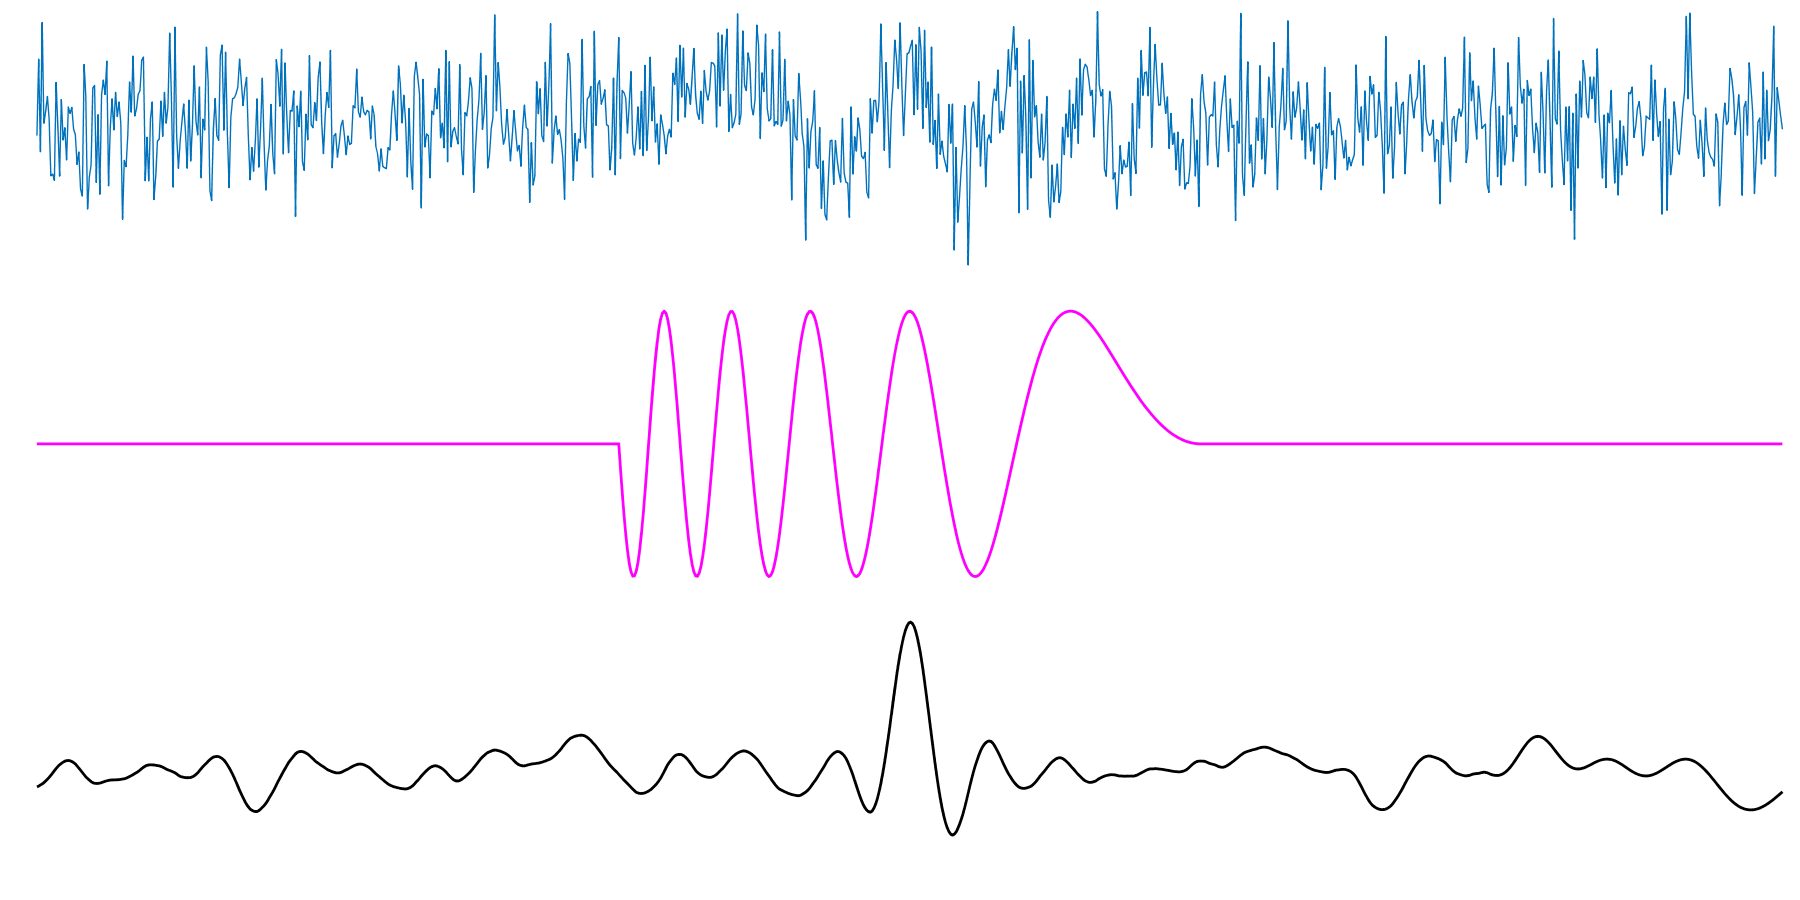

In [21]:
%plot -s 1800,900 -r 100
layout(3,1);
nexttile(); plot(x(t),'linewidth',1); axis off;
nexttile(); plot(h(t),'m','linewidth',2); axis off;
nexttile(); plot(r(t),'k','linewidth',2); axis off;

<center><h3>
Dan Jacobellis | EE 445S | November 8, 2021
</h3></center>

$g(t)$ is a signal or pulse generated by the transmitter

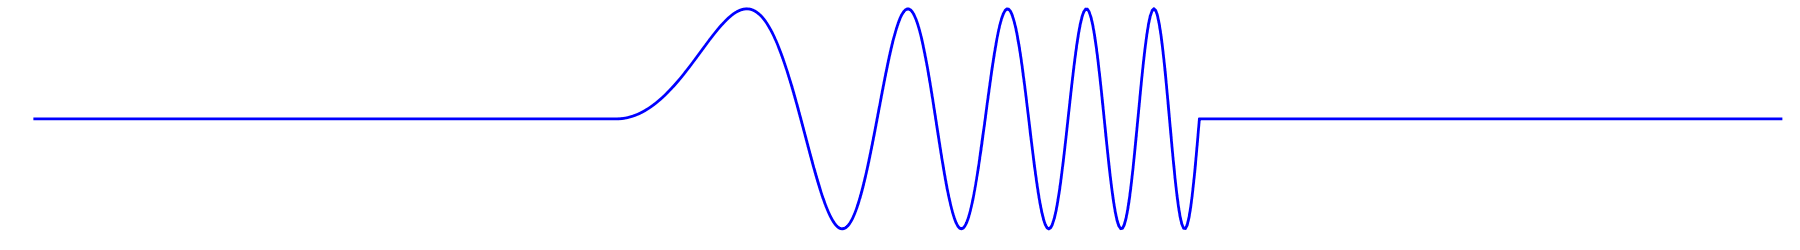

In [24]:
%plot -s 1800,250 -r 100
layout(1,1); nexttile();
plot(g(t),'b','linewidth',2); axis off;

$w(t)$ is additive noise

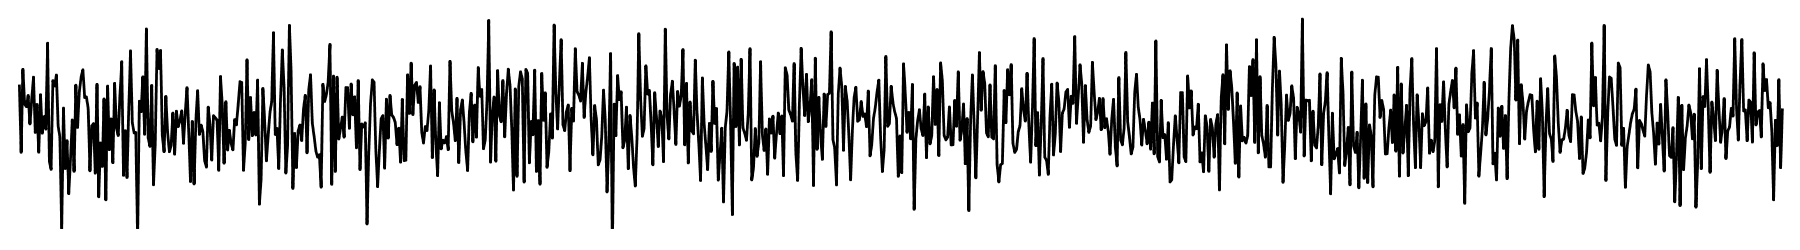

In [25]:
layout(1,1); nexttile();
plot(w(t),'k','linewidth',2); axis off; ylim([-3,3]);

$x(t) = g(t) + w(t)$ is the received signal 

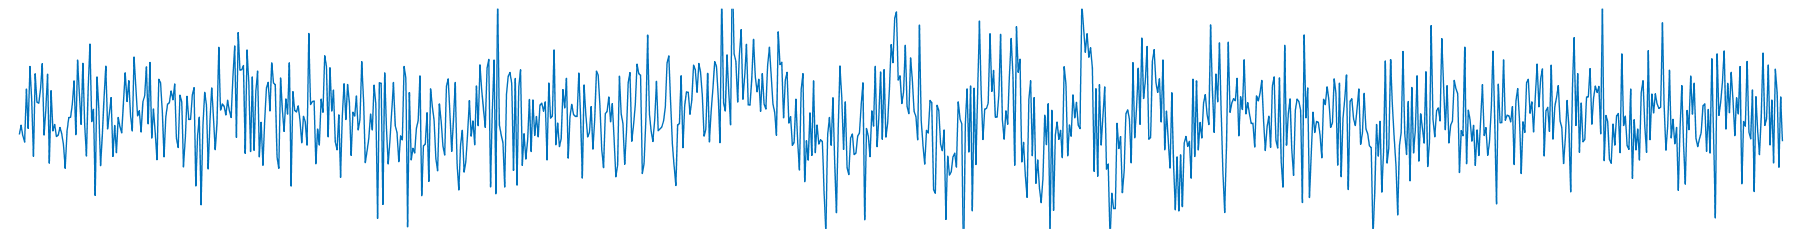

In [26]:
layout(1,1); nexttile();
plot(x(t),'linewidth',1); axis off; ylim([-3,3]);

$x(t)$ may contain one or more copies of $g(t)$ which are shifted, scaled, or overlapping

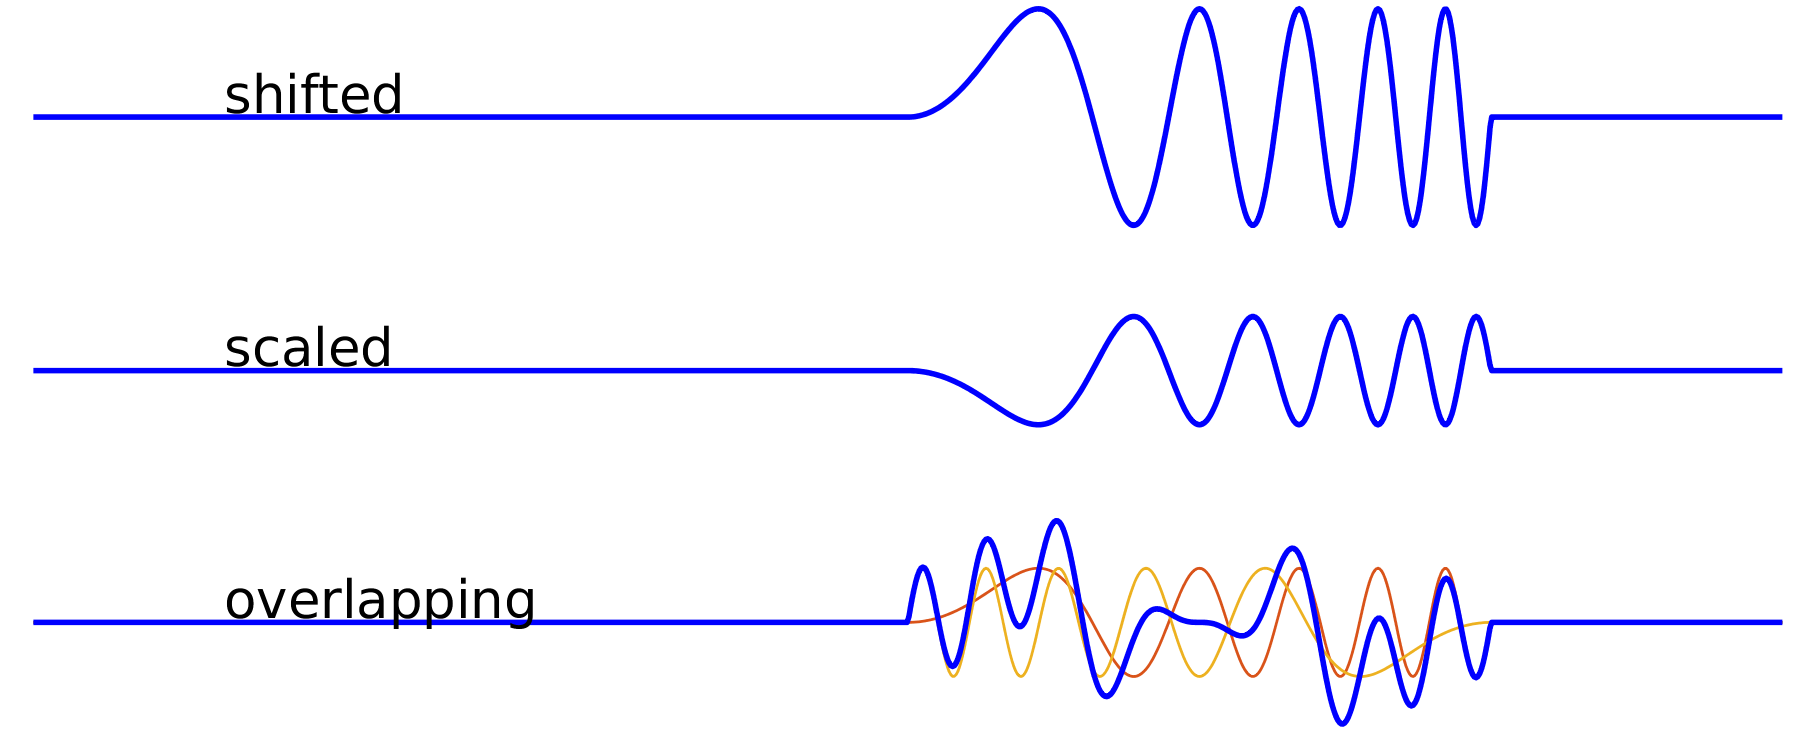

In [81]:
%plot -s 1800,750 -r 100
layout(3,1)

y = g(t-T/2);
nexttile(); plot(y,'b','linewidth',4); axis off;
text(100,0.2,'\fontsize{30} shifted','interpreter','tex');

y = -g(t-T/2);
nexttile(); plot(y,'b','linewidth',4); axis off; ylim([-2,2])
text(100,0.4,'\fontsize{30} scaled','interpreter','tex');

y1 = g(t-0.5*T);
y2 = -g(-t+1.5*T);
y3 = y1 + y2;
nexttile(); plot([y3;y1;y2]','linewidth',2);
hold on; plot(y3,'b','linewidth',4); axis off;
text(100,0.4,'\fontsize{30} overlapping','interpreter','tex');

Our goal is to create a filter $h(t)$ which will help us to *detect*, *localize*, and *characterize* any copies of $g(t)$ that are present in $x(t)$.

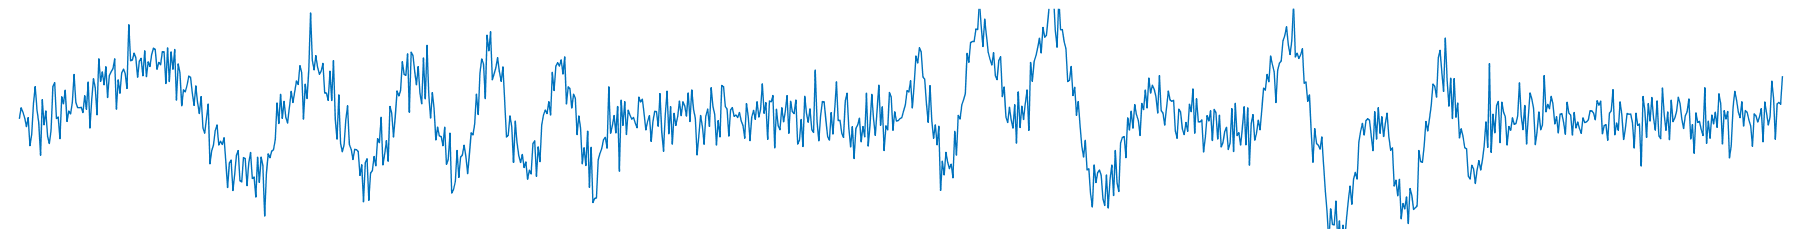

In [101]:
%plot -s 1800,250 -r 100
y = g(t-0.5*T) - g(-t+1.5*T) + g(t+T) + 0.3*w(t);
layout(1,1); nexttile();
plot(y,'linewidth',1); axis off; ylim([-2,2]);